In [1]:
import numpy as np
import sys
from setup.bandits import Environment
from setup.testing import Test
import math

class Policy(object):
    def __init__(self,actions):
        self.num_actions=actions
    def act(self):
        pass
    def feedback(self,action,reward):
        pass



## Greedy

In [2]:
class Greedy(Policy):
    def __init__(self,actions,**kwargs):
        super().__init__(actions)
        self.total_counts=np.zeros(self.num_actions)
        self.name="Greedy"
        self.total_reward=np.zeros(self.num_actions)
    def act(self):
        current_track=np.divide(self.total_reward,self.total_counts,where=self.total_counts>0)
        current_track[self.total_counts==0]=0
        taken_action=np.argmax(current_track)
        return taken_action
    def feedback(self,action,reward):
        self.total_reward[action]+=reward
        self.total_counts[action]+=1


Distribution: Bernoulli
Rewards [0.44873522 0.28353771 0.62566496 0.49560654 0.33753382 0.57348535
 0.26063078 0.99474795 0.56935494 0.0912191 ]
 most optimal reward 7


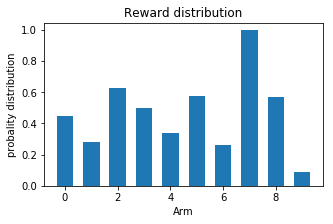

---------------------------------------------------------
Policy Greedy
 Arms pull [1000.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 max arm pull:0


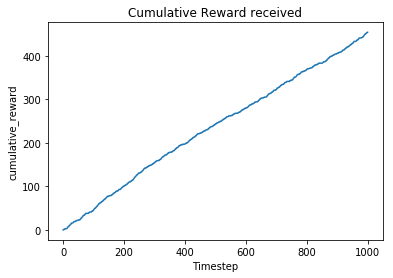

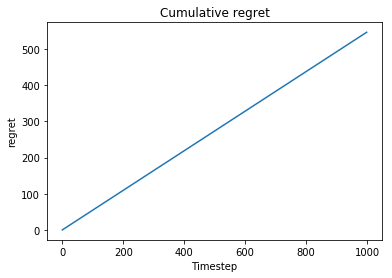

In [3]:

num_actions=10
trials=1000
env=Environment(num_actions)
agent=Greedy(num_actions)
test=Test(env,agent)
test.run_bandit(trials)

In greedy approach we take the arm with highest expected arm reward.
r<sub>a</sub> =E[r|a]

Choose the arm having max value of r<sub>a</sub> over all the arms

But it has a disadvantage that greedy might lock down into a suboptimal arm and never comes back from it.

## Epsilon Greedy

Distribution: Bernoulli
Rewards [0.44873522 0.28353771 0.62566496 0.49560654 0.33753382 0.57348535
 0.26063078 0.99474795 0.56935494 0.0912191 ]
 most optimal reward 7


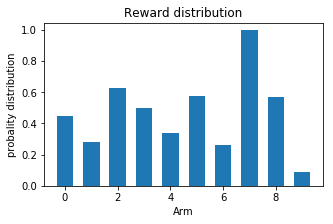

---------------------------------------------------------
Policy EpsilonGreedy
 Arms pull [ 52.  64.  51.  54.  43.  53.  54. 524.  45.  60.]
 max arm pull:7


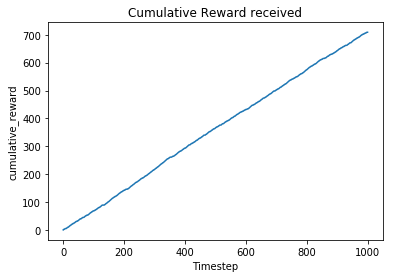

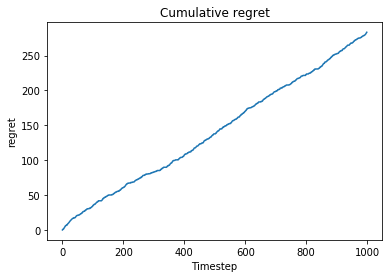

In [4]:
class EpsilonGreedy(Greedy):
    def __init__(self,num_actions,epsilon=0.5,**kwargs):
        super().__init__(num_actions)
        self.name="EpsilonGreedy"
        self.epsilon=epsilon
        if(epsilon > 1 or epsilon<0):
            print("Epsilon should be between 0 and 1",flush=True)
            sys.exit(0)
    def act(self):
        choice=np.random.binomial(1,self.epsilon)
        if(choice==1):
            return np.random.choice(self.num_actions)
        else:
            return super().act()
            

num_actions=10
trials=1000
env=Environment(num_actions)
agent=EpsilonGreedy(num_actions)
test=Test(env,agent)
test.run_bandit(trials)

Epsilon greedy seems to give better results as compared to naive greedy one

## UCB(Upper confidence bound)

Distribution: Bernoulli
Rewards [0.44873522 0.28353771 0.62566496 0.49560654 0.33753382 0.57348535
 0.26063078 0.99474795 0.56935494 0.0912191 ]
 most optimal reward 7


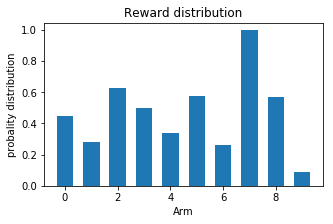

---------------------------------------------------------
Policy UCB
 Arms pull [  6.   6.   4.   6.   7.  10.   4. 944.   8.   5.]
 max arm pull:7


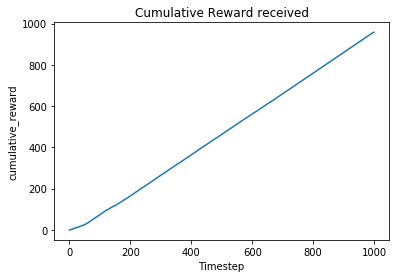

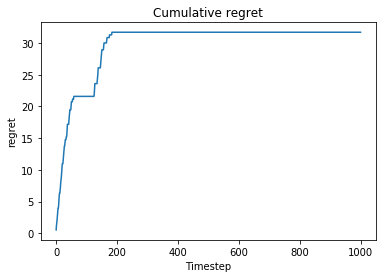

In [5]:
class UCB(Greedy):
    def __init__(self, num_actions):
        super().__init__( num_actions)
        self.name = "UCB"
        self.round = 0

    def act(self):
        current_action = None
        self.round += 1
        if self.round <= self.num_actions:
            current_action = self.round-1;
        else:
            """At round t, play the arms with maximum average and exploration bonus"""
            expected_arm=np.divide(self.total_reward,self.total_counts)
            expected_arm=np.add(expected_arm,
                np.divide(np.ones_like(self.total_counts)*math.sqrt(2*math.log(self.round)),self.total_counts))
            current_action = np.argmax(expected_arm)
        return current_action


num_actions=10
trials=1000
env=Environment(num_actions)
agent=UCB(num_actions)
test=Test(env,agent)
test.run_bandit(trials)

the UCB algorithm provides a healthy trade-off between explore exploit <br>
Besides the r<sub>a</sub> factor of the greedy algorithm it considers an upper confidence boud 
of sqrt(2*log(t)/n<sub>a</sub>) <br>
So that arm is choosed which have greater value of<br>
    r<sub>a</sub> + 2*log(t) / n<sub>a</sub> <br>
     
     